# Wine Classification - Supervised vs Unsupervised Learning Algorithms
#### Investigation into the accuracies of supevised and unsupervised machine learning algorithms on the classification of wines given a set of chemical characteristics

Algorithms used:
- K-Means
- K-Nearest Neighbours
- Decision Tree
- Logistic Regression

Data imported from UCI Machine Learning Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
headings = ['Alcohol', 'Malic_acid','Ash','Alcalinity','Magnesium','Total_phenols','Flavanoids','Nonflavanoid','Proanthocyanins','Color','Hue','OD280','Proline']  

wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

labels = wine_data[0]
wine_data.drop(labels=0,axis=1,inplace=True)

wine_data.columns = headings
print(wine_data.head())

   Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
0    14.23        1.71  2.43        15.6        127           2.80   
1    13.20        1.78  2.14        11.2        100           2.65   
2    13.16        2.36  2.67        18.6        101           2.80   
3    14.37        1.95  2.50        16.8        113           3.85   
4    13.24        2.59  2.87        21.0        118           2.80   

   Flavanoids  Nonflavanoid  Proanthocyanins  Color   Hue  OD280  Proline  
0        3.06          0.28             2.29   5.64  1.04   3.92     1065  
1        2.76          0.26             1.28   4.38  1.05   3.40     1050  
2        3.24          0.30             2.81   5.68  1.03   3.17     1185  
3        3.49          0.24             2.18   7.80  0.86   3.45     1480  
4        2.69          0.39             1.82   4.32  1.04   2.93      735  


In [3]:
## In order to produce comparable results, I will split the data into training and test sets - for the unsupervised
### learning algorithms I will use just the training data and calculate the accuracy using the given labels. For the
#### supervised learning algorithms I will calculate the accuracy using the test data.

x_train, x_test, y_train, y_test = train_test_split(wine_data, labels, train_size = 0.8)

## Unsupervised - K-Means

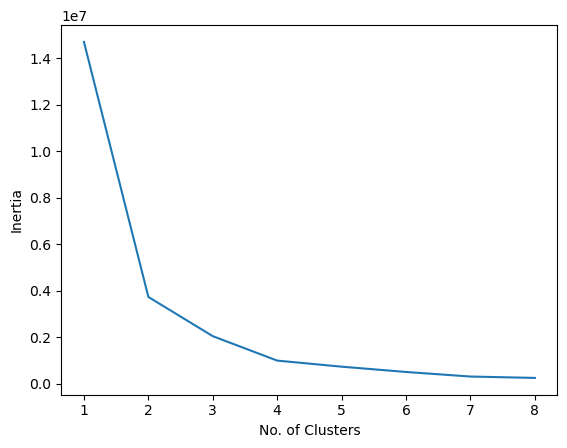

In [4]:
## Find best number of clusters
inertias = []

for k in range(1,9):
  k_means = KMeans(n_clusters=k)
  k_means.fit(x_train)
  inertias.append(k_means.inertia_)

plt.plot(list(range(1,9)),inertias)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [5]:
## Looking at the graph, 3 is the optimum number of clusters
k_opt = 3
accuracies = []
for i in range(100):
    k_means = KMeans(n_clusters=k_opt)
    k_means.fit(x_train)
    predicted = k_means.predict(x_train)+1

    results = pd.DataFrame({'predicted':predicted,'labels':y_train})

    results['correct?'] = results.apply(lambda row: 1 if row.predicted == row.labels else 0, axis=1)

    accuracies.append(results['correct?'].sum()/len(results))

# plt.scatter(list(range(100)),accuracies)
# plt.show

KMeans_accuracy = np.mean(accuracies)
print(KMeans_accuracy)

# Not great!

0.25359154929577454


## Supervised - K-Nearest Neighbours

In [6]:
from sklearn.neighbors import KNeighborsClassifier

/Users/BenPollins/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/BenPollins/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/BenPollins/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/BenPollins/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

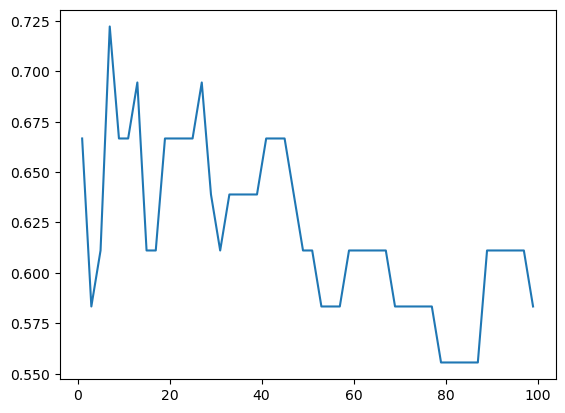

In [7]:
## Find best number of Neighbours

KNN_accuracies = []
KNN_ks = []

for k in range(1,101,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    
    KNN_accuracies.append(KNN.score(x_test,y_test))
    KNN_ks.append(k)

plt.plot(KNN_ks,KNN_accuracies)
plt.show()

KNN_kopt = KNN_ks[KNN_accuracies.index(max(KNN_accuracies))]

In [8]:
## Re-fit the model using K opt
KNN = KNeighborsClassifier(n_neighbors=KNN_kopt)
KNN.fit(x_train,y_train)

KNN_accuracy = KNN.score(x_test, y_test)
print(KNN_accuracy)

0.7222222222222222


/Users/BenPollins/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Supervised - Decision Tree

In [9]:
from sklearn import tree

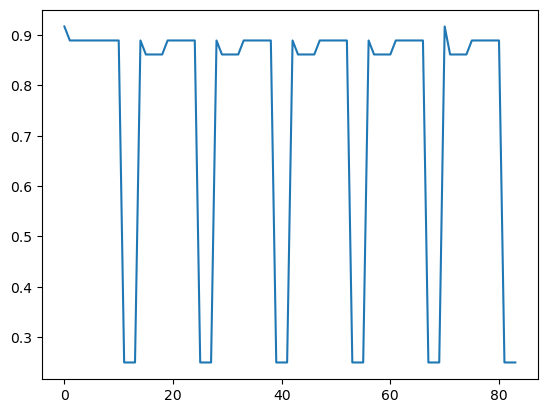

2 0.0


In [10]:
## Optimise decision tree for best max_depth and ccp_alpha combo

dtree_params = []
dtree_accuracies = []

for md in range(2,8):
    for ccp in range(0,350,25):
        ccp = ccp/1000
        dtree = tree.DecisionTreeClassifier(max_depth=md, ccp_alpha=ccp, criterion='gini')
        dtree.fit(x_train, y_train)
        dtree_accuracies.append(dtree.score(x_test,y_test))
        dtree_params.append([md,ccp])

plt.plot(dtree_accuracies)
plt.show()

dtree_opt_params = dtree_params[dtree_accuracies.index(max(dtree_accuracies))]
md_opt = dtree_opt_params[0]
ccp_opt = dtree_opt_params[1]
print(md_opt,ccp_opt)

0.9166666666666666


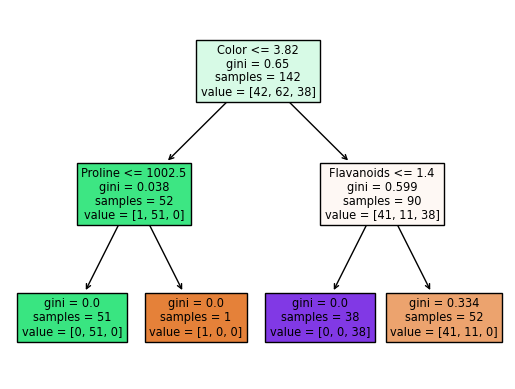

In [11]:
## Refit model with optimum parameters

dtree = tree.DecisionTreeClassifier(max_depth=md_opt, ccp_alpha=ccp_opt, criterion='gini')
dtree.fit(x_train, y_train)

dtree_accuracy = dtree.score(x_test, y_test)
print(dtree_accuracy)

tree.plot_tree(dtree, feature_names=x_train.columns, max_depth=5,label='all', filled=True)
plt.show()

## Supervised - Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

LR = LogisticRegression()

LR.fit(scaled_x_train, y_train)

LR_accuracy = LR.score(scaled_x_test, y_test)
print(LR_accuracy)

# print(LR.predict_proba(scaled_x_test))


0.9444444444444444


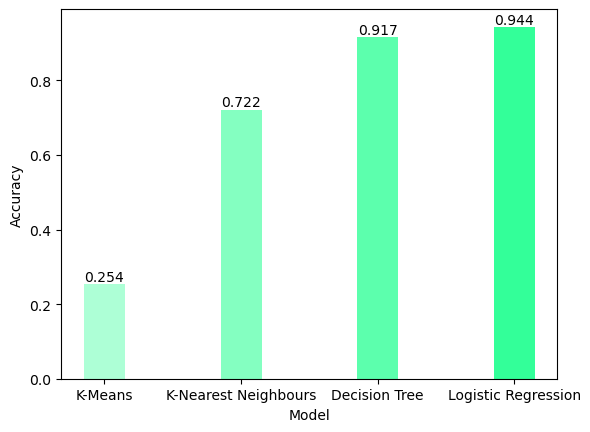

In [14]:
model_labels = ['K-Means', 'K-Nearest Neighbours', 'Decision Tree', 'Logistic Regression']
model_accuracies = [round(KMeans_accuracy,3), round(KNN_accuracy,3), round(dtree_accuracy,3), round(LR_accuracy,3)]

def addlabels(model_labels,model_accuracies):
    for i in range(len(model_labels)):
        plt.text(i,model_accuracies[i],model_accuracies[i],ha='center',va='bottom')

plt.bar(model_labels,model_accuracies,width = 0.3,color=[(0.2,1,0.6,0.4), (0.2,1,0.6,0.6), (0.2,1,0.6,0.8), (0.2,1,0.6,1)])
plt.xlabel('Model')
plt.ylabel('Accuracy')
addlabels(model_labels,model_accuracies)
plt.show()